In [1]:
import numpy as np
from ease_grid import EASE2_grid
grid_size = 36000
egrid = EASE2_grid(grid_size)
assert egrid.shape == (406, 964)
from impacts import IMPAaCS
import pickle as pkl

In [2]:
LAT_BOUND = 40
LON_BOUND = 180
I = IMPAaCS(egrid, max_depth_of_impact_melt=330, 
               lon_lims = [-1*LON_BOUND, LON_BOUND], lat_lims = [-1*LAT_BOUND, LAT_BOUND])
new_lat=[]
new_lon=[]
for i in I.lon_subset:
    if np.abs(i)<LON_BOUND:
        new_lon.append(i)
for i in I.lat_subset:
    if np.abs(i)<LAT_BOUND:
        new_lat.append(i)
I.lon_subset = new_lon
I.lat_subset = new_lat
I.n_x = len(I.lon_subset)
I.n_y = len(I.lat_subset)

cube volume 2596.6418774091976, in km^3
sample area 327914322.8467431, in km^2
our sample represents 0.646 of earth's surface area
we need to multiply our volume by 1.548 to correct for sample/earth area
multiply n_cubes by 4019.8 to get crust volume [km^3] on earth
divide by 7200000000.0 to get relative percent crust volume
the final multiplier to get relative percent volume crust is 5.583069263921003e-07


plotting SiO2 map for layers [0], and distribution for layer 0


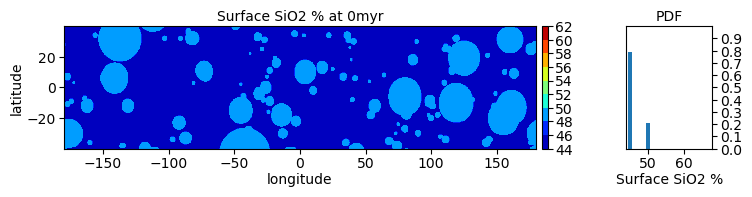

plotting SiO2 map for layers [0], and distribution for layer 0


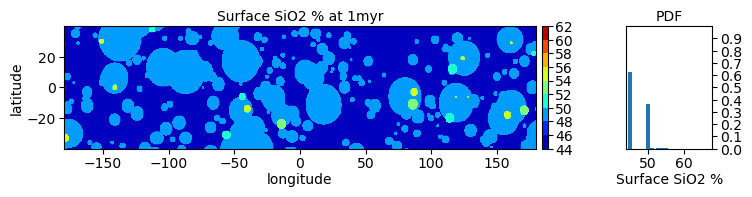

plotting SiO2 map for layers [0], and distribution for layer 0


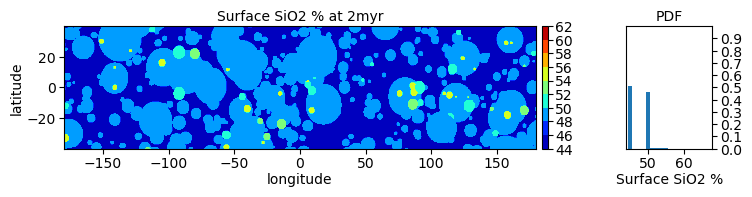

plotting SiO2 map for layers [0], and distribution for layer 0


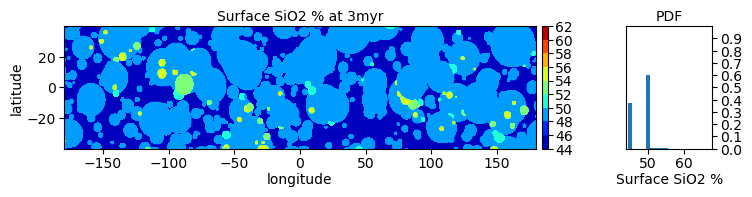

plotting SiO2 map for layers [0], and distribution for layer 0


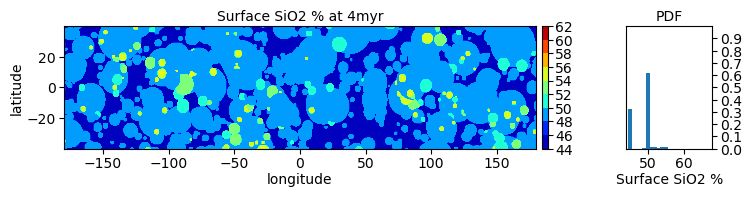

plotting SiO2 map for layers [0], and distribution for layer 0


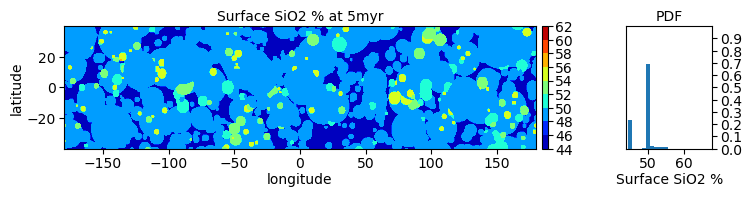

plotting SiO2 map for layers [0], and distribution for layer 0


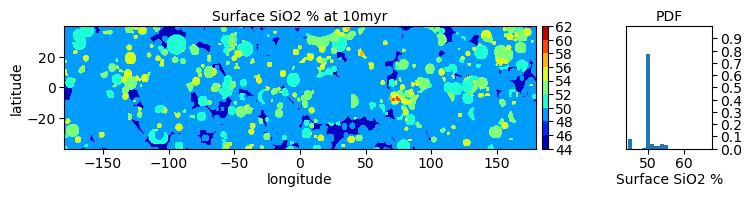

plotting SiO2 map for layers [0], and distribution for layer 0


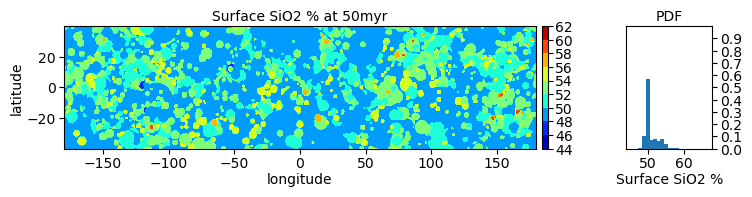

plotting SiO2 map for layers [0], and distribution for layer 0


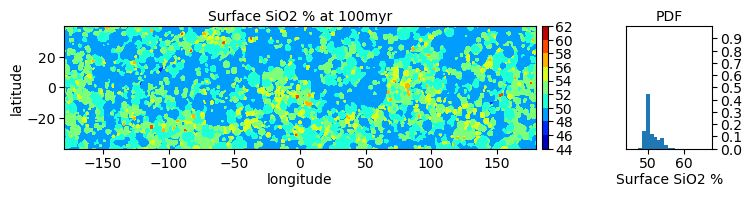

plotting SiO2 map for layers [0], and distribution for layer 0


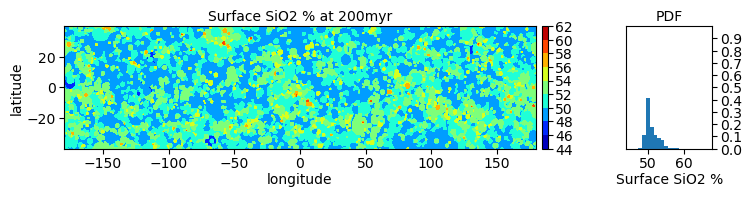

plotting SiO2 map for layers [0], and distribution for layer 0


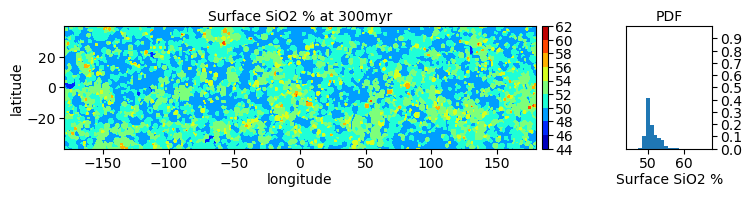

plotting SiO2 map for layers [0], and distribution for layer 0


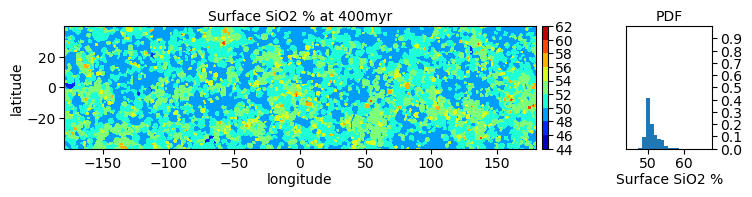

plotting SiO2 map for layers [0], and distribution for layer 0


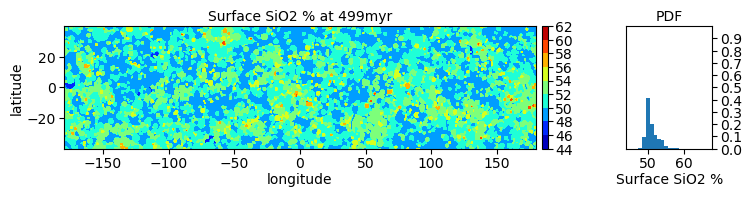

plotting SiO2 map for layers [0], and distribution for layer 0


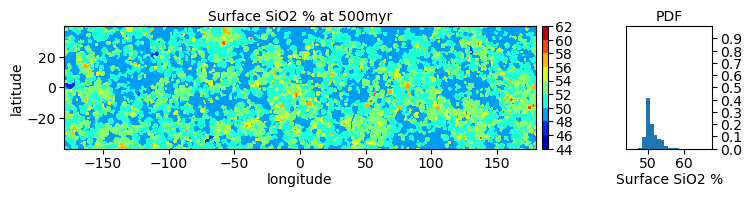

In [4]:
ENS=3
for t in [0, 1,2,3,4,5, 10, 50, 100, 200, 300, 400, 499, 500]:
    state_file = f'/mnt/d/impaacs/impact_states/impacts_ens{ENS}_t{t}.pkl'
    with open(state_file, 'rb') as fb:
        impact_states = pkl.load(fb)
    I.grid_cell_state = impact_states
    I.sim_time=t*1000000
    I.do_volume_by_layer(n_layers=1)
    I.plot_map_and_bar(save_figure=True, 
                        plot_figure=True, map_layers=[0], 
                        dist_layer=0,
                        fig_path=f"./figs/map_and_bar_ENS{ENS}_")
